In [64]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 695.4 kB/s eta 0:00:00


In [67]:
!pip install heatmap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\saite\AppData\Local\Temp\pip-install-qlp0eqis\heatmap_70906229ebab48238e51a342d34886f6\setup.py", line 15
      print "On Windows, skipping build_ext."
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import linear_model

In [15]:
digits=load_digits()

In [16]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [17]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

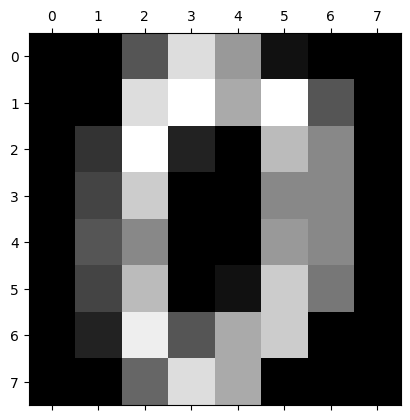

In [23]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

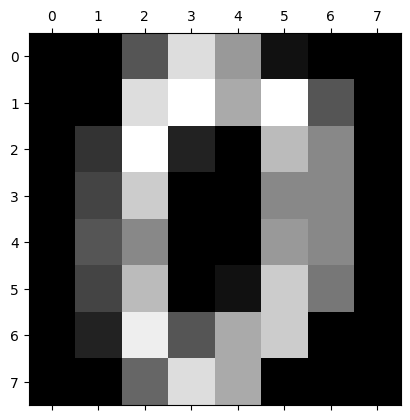

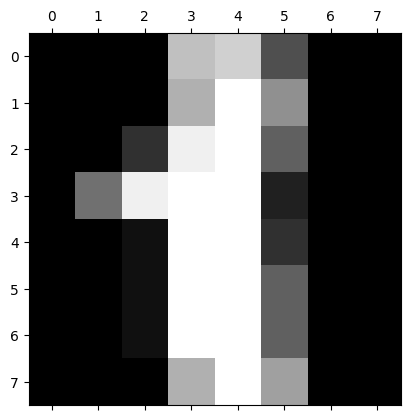

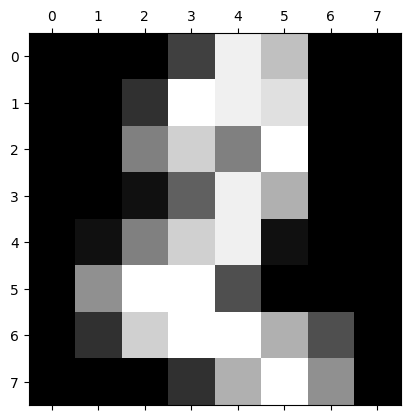

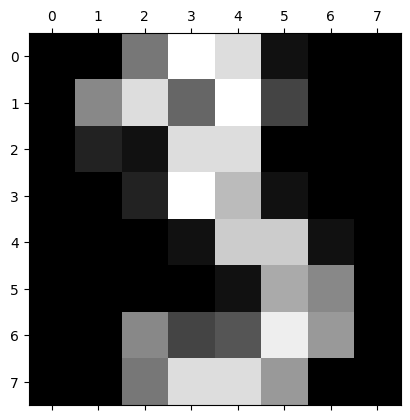

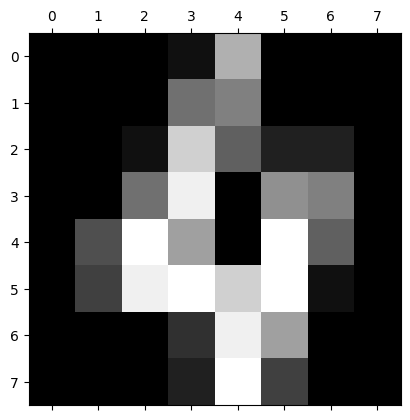

In [26]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [27]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [28]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [38]:
len(X_train)

1437

In [39]:
len(X_test)


360

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [42]:
model.fit(X_train,Y_train)

C:\Users\saite\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
model.score(X_test,Y_test)

0.9555555555555556

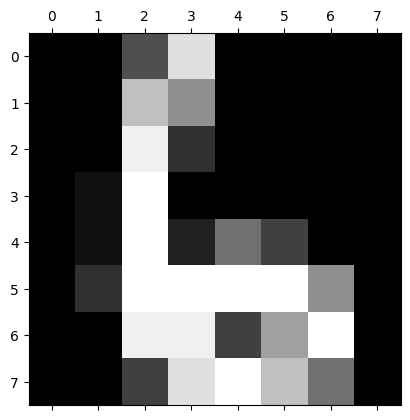

In [48]:
plt.matshow(digits.images[67])

In [49]:
digits.target[67]

6

In [52]:
model.predict([digits.data[67]])

array([6])

In [54]:
model.predict([digits.data[57]])

array([2])

In [55]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [56]:
Y_predicted=model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [62]:
cm =  confusion_matrix(Y_test,Y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  2,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  1],
       [ 0,  2,  1,  0,  1,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 33]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

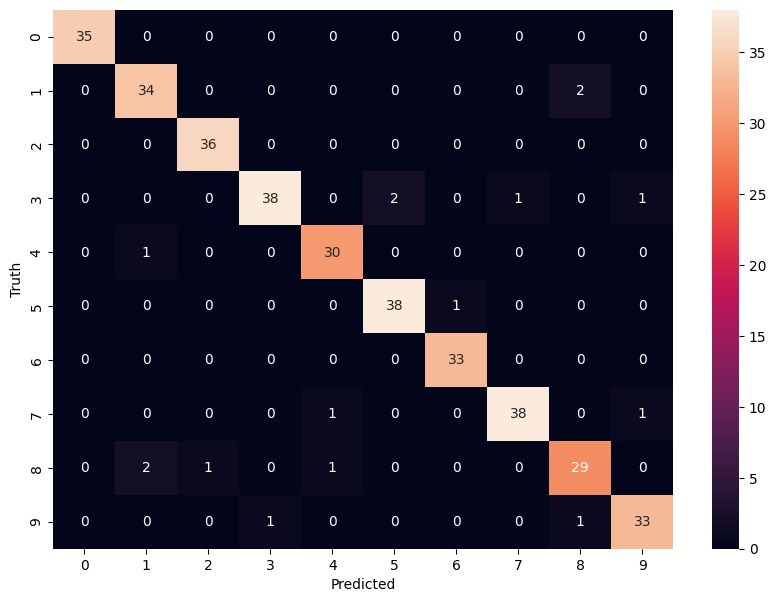

In [73]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")